# Building models in Logistic

## Data Description-

**age:** numeric
<br>**job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
<br>**marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>**education:** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>**default:** has credit in default? (categorical: 'no','yes','unknown')
<br>**housing:** has housing loan? (categorical: 'no','yes','unknown')
<br>**loan:** has personal loan? (categorical: 'no','yes','unknown')
<br>**contact:** contact communication type (categorical: 'cellular','telephone') 
<br>**month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>**day_of_week:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>**duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>**campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>**previous:** number of contacts performed before this campaign and for this client (numeric)
<br>**poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>**emp.var.rate:** employment variation rate - quarterly indicator (numeric)
<br>**cons.price.idx:** consumer price index - monthly indicator (numeric) 
<br>**cons.conf.idx:** consumer confidence index - monthly indicator (numeric) 
<br>**euribor3m:** euribor 3 month rate - daily indicator (numeric)
<br>**nr.employed:** number of employees - quarterly indicator (numeric)

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
bank = pd.read_csv("../input/bank.csv")

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
bank.shape

(4521, 17)

In [6]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
bank.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [8]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
bank['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [10]:
bank['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [11]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [12]:
bank['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [13]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [14]:
bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

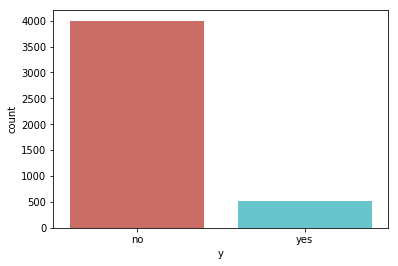

In [15]:
sns.countplot(x='y',data=bank,palette='hls')
plt.show()

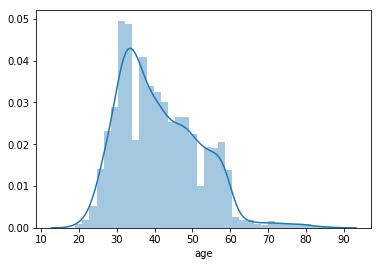

In [16]:
sns.distplot(bank['age'])

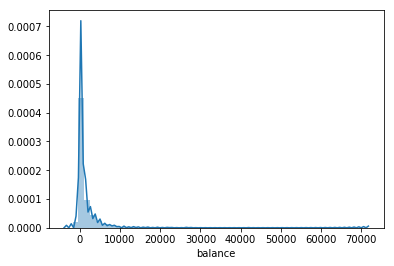

In [17]:
sns.distplot(bank['balance'])

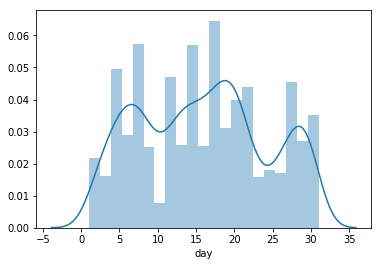

In [18]:
sns.distplot(bank['day'])

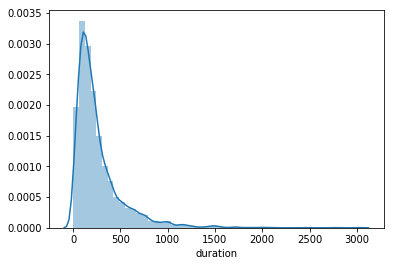

In [19]:
sns.distplot(bank['duration'])

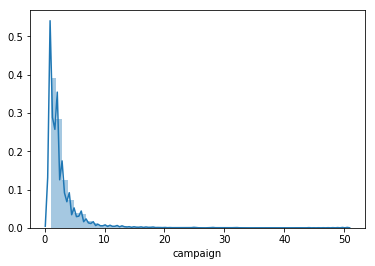

In [20]:
sns.distplot(bank['campaign'])

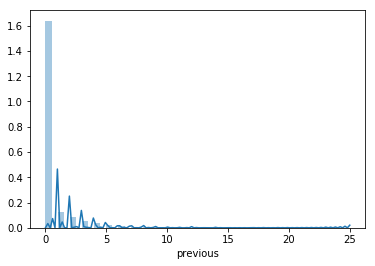

In [21]:
sns.distplot(bank['previous'])

In [22]:
bank.groupby('age').mean()

,balance,day,duration,campaign,pdays,previous
age,,,,,,
19,393.500000,10.750000,223.750000,6.000000,-1.000000,0.000000
20,661.333333,17.666667,235.666667,2.333333,123.000000,1.666667
21,1774.285714,17.000000,235.142857,2.428571,55.285714,1.571429
22,1455.333333,12.333333,186.666667,1.333333,23.777778,1.444444
23,2117.950000,16.500000,254.500000,3.050000,16.350000,0.050000
24,634.625000,17.500000,222.666667,2.250000,31.875000,0.166667
25,1240.068182,17.454545,227.181818,3.000000,34.272727,0.318182
26,788.558442,18.402597,247.532468,3.142857,29.922078,0.480519
27,851.776596,16.500000,304.904255,2.744681,41.765957,0.372340


In [23]:
bank.groupby('duration').mean()

,age,balance,day,campaign,pdays,previous
duration,,,,,,
4,28.000000,318.000000,27.000000,4.000000,-1.000000,0.000000
5,39.444444,2521.444444,20.444444,4.555556,105.666667,2.000000
6,28.500000,510.000000,20.500000,3.500000,-1.000000,0.000000
7,40.333333,3380.833333,17.833333,6.500000,150.000000,4.500000
8,40.444444,3317.555556,12.111111,4.555556,172.555556,1.555556
9,40.300000,194.500000,19.100000,5.200000,33.800000,1.700000
10,37.777778,1176.000000,15.222222,4.555556,78.888889,0.222222
11,35.875000,967.500000,20.625000,7.250000,39.000000,0.250000
12,34.600000,1550.600000,18.000000,8.600000,142.600000,2.000000


Text(0, 0.5, 'Frequency')

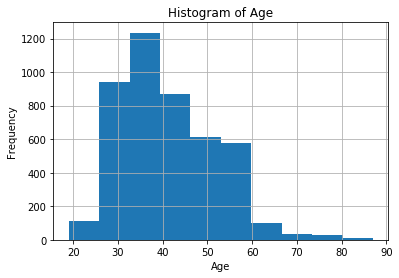

In [24]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

## Correlation Matrix

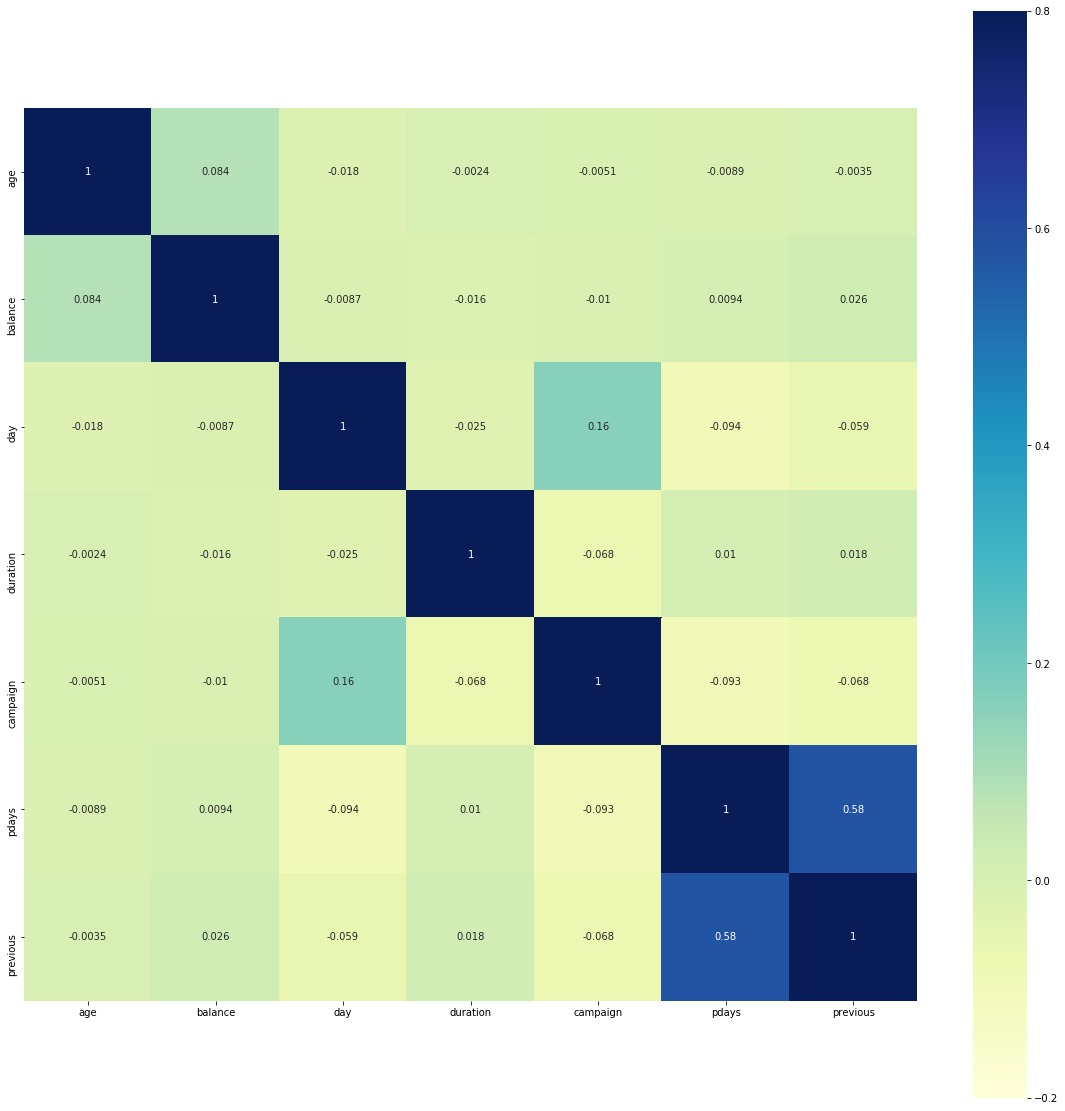

In [25]:
fig, ax=plt.subplots(figsize=(20,20))
correlation=bank.corr()
sns.heatmap(correlation,square=True, vmin=-0.2, vmax=0.8,cmap="YlGnBu",annot=True)

## Creating Dummy Variables

In [26]:
bank= pd.get_dummies(bank, drop_first=True)
bank.head(3)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Splitting the data into train and test data set

In [27]:
x=bank.iloc[:,0:42]
y=bank['y_yes']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=10) 

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3616, 42)
(905, 42)
(3616,)
(905,)


In [29]:
x_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
1444,57,13,8,323,2,368,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
573,81,1,19,65,5,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
582,31,236,4,211,3,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
348,44,0,16,159,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
y_train.head()

1444    0
573     0
582     0
348     0
4518    0
Name: y_yes, dtype: uint8

In [31]:
y_train.value_counts()

0    3204
1     412
Name: y_yes, dtype: int64

## Building the Logistic Model

In [32]:
import statsmodels.api as sm
logit_model1 = sm.Logit(y, x)
result=logit_model1.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4479
Method:                           MLE   Df Model:                           41
Date:                Tue, 14 May 2019   Pseudo R-squ.:                     inf
Time:                        03:31:36   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0211      0.006     -3.614      0.000      -0.033      -0.010
balance

/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [33]:
logreg1=LogisticRegression()
logreg1.fit(x_train,y_train)
pred1 = logreg1.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg1.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89834


In [34]:
y_test.value_counts()

0    796
1    109
Name: y_yes, dtype: int64

### Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,pred1)
print(confusion_matrix)

[[777  19]
 [ 73  36]]


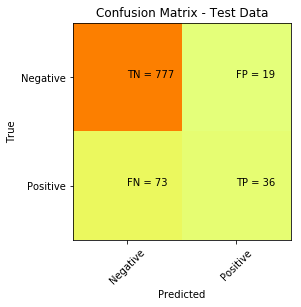

In [36]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

In [37]:
total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9141176470588235
Specificity :  0.6545454545454545


In [38]:
fpr, tpr, thresholds = roc_curve(y_test, pred1)
a=auc(fpr,tpr)
print("Area under the curve:",a)

Area under the curve: 0.6532029413120649


As we can see the area under the curve is 65% which is very less.

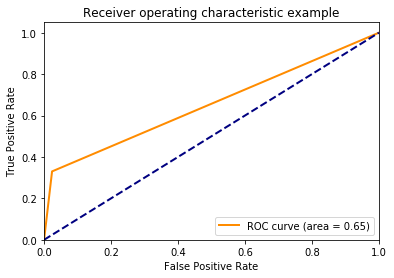

In [39]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % a)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       796
           1       0.65      0.33      0.44       109

   micro avg       0.90      0.90      0.90       905
   macro avg       0.78      0.65      0.69       905
weighted avg       0.88      0.90      0.88       905



**Precision:** is the ratio TP / (TP + FP) where TP is number of true positives and FP number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

<br>**Recall:** is the ratio TP / (TP + FN) where TP is the number of true positives and FN number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

<br>**F-score:** can be interpreted as a weighted harmonic mean of the precision and recall, where an F score reaches its best value at 1 and worst score at 0. The F score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall.

<br>**Support:** is the number of occurrences of each class in y_test.

### Rebuilding the model with only significant variables

In [41]:
cols=['balance', 'day', 'previous', 'job_entrepreneur', 'job_housemaid', 
      'job_management', 'job_self-employed','job_services','job_unknown','education_secondary',
     'education_tertiary','default_yes','contact_telephone','month_dec','month_feb','month_jun',
     'month_oct','poutcome_other'] 
x=bank[cols]
y=bank['y_yes']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=10) 

In [43]:
print("x_train:",x_train.shape)
print("y_train",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (3616, 18)
y_train (3616,)
x_test: (905, 18)
y_test: (905,)


In [44]:
x.head()

,balance,day,previous,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_unknown,education_secondary,education_tertiary,default_yes,contact_telephone,month_dec,month_feb,month_jun,month_oct,poutcome_other
0,1787,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4789,11,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,1350,16,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1476,3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [45]:
logit_model2=sm.Logit(y_train,x_train)
result=logit_model2.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Results: Logit
Model:                 Logit              Pseudo R-squared:   inf   
Dependent Variable:    y_yes              AIC:                inf   
Date:                  2019-05-14 03:33   BIC:                inf   
No. Observations:      3616               Log-Likelihood:     -inf  
Df Model:              17                 LL-Null:            0.0000
Df Residuals:          3598               LLR p-value:        1.0000
Converged:             1.0000             Scale:              1.0000
No. Iterations:        6.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
balance             -0.0000   0.0000  -2.0144 0.0440 -0.0001 -0.0000
day                 -0.0702   0.0

/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [46]:
logreg2=LogisticRegression()
logreg2.fit(x_train,y_train)
pred2 = logreg2.predict(x_test)

In [47]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg2.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87514


In [48]:
y_test.value_counts()

0    796
1    109
Name: y_yes, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test,pred2)
print(confusion_matrix2)

[[791   5]
 [108   1]]


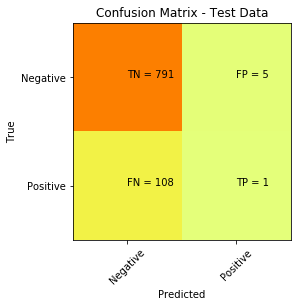

In [50]:
plt.clf()
plt.imshow(confusion_matrix2, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix2[i][j]))
plt.show()

In [104]:
sensitivity2 = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[1,0])
print('Sensitivity : ', sensitivity2 )

specificity2 = confusion_matrix2[1,1]/(confusion_matrix2[1,1]+confusion_matrix2[0,1])
print('Specificity : ', specificity2)

Sensitivity :  0.8798665183537263
Specificity :  0.16666666666666666


In [105]:
fpr, tpr, thresholds = roc_curve(y_test, pred2)
a=auc(fpr,tpr)
print("Area under the curve:",a)

Area under the curve: 0.5014464524457147


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       796
           1       0.17      0.01      0.02       109

   micro avg       0.88      0.88      0.88       905
   macro avg       0.52      0.50      0.48       905
weighted avg       0.79      0.88      0.82       905



### Rebuilding the model after standardization

In [55]:
cols=['balance', 'day', 'previous', 'job_entrepreneur', 'job_housemaid', 
      'job_management', 'job_self-employed','job_services','job_unknown','education_secondary',
     'education_tertiary','default_yes','contact_telephone','month_dec','month_feb','month_jun',
     'month_oct','poutcome_other'] 
x=bank[cols]
y=bank['y_yes']

In [56]:
x.head()

,balance,day,previous,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_unknown,education_secondary,education_tertiary,default_yes,contact_telephone,month_dec,month_feb,month_jun,month_oct,poutcome_other
0,1787,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4789,11,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,1350,16,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1476,3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_std=scaler.fit_transform(x)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_std,y,test_size = .3, random_state=99,stratify=y) 

In [59]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (3164, 18)
y_train: (3164,)
x_test: (1357, 18)
y_test: (1357,)


In [60]:
logit_model3=sm.Logit(y_train,x_train)
result=logit_model3.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 20.263253
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: inf        
Dependent Variable: y_yes            AIC:              128261.8669
Date:               2019-05-14 03:37 BIC:              128370.9396
No. Observations:   3164             Log-Likelihood:   -64113.    
Df Model:           17               LL-Null:          0.0000     
Df Residuals:       3146             LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
---------------------------------------------------------------------
         Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
---------------------------------------------------------------------
x1      -0.0158      0.0371    -0.4258    0.6703    -0.0886    0.0570
x2      -0.0069      0.0383    -0.1804  

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [61]:
logreg3=LogisticRegression(C=0.001)
logreg3.fit(x_train,y_train)
pred3 = logreg3.predict(x_test)

In [62]:
logreg3

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg3.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88357


In [64]:
y_test.value_counts()

0    1201
1     156
Name: y_yes, dtype: int64

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(y_test,pred3)
print(confusion_matrix3)

[[1197    4]
 [ 154    2]]


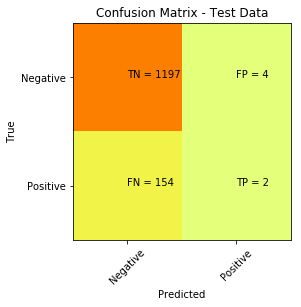

In [66]:
plt.clf()
plt.imshow(confusion_matrix3, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix3[i][j]))
plt.show()

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1201
           1       0.33      0.01      0.02       156

   micro avg       0.88      0.88      0.88      1357
   macro avg       0.61      0.50      0.48      1357
weighted avg       0.82      0.88      0.83      1357



## Using SMOTE 

In [69]:
x=bank.iloc[:,0:42]
y=bank['y_yes']

In [70]:
from imblearn.over_sampling import SMOTE
y.value_counts()

Using TensorFlow backend.


0    4000
1     521
Name: y_yes, dtype: int64

In [71]:
smt = SMOTE()
x_smote, y_smote = smt.fit_sample(x, y)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size = .2, random_state=10) 

In [73]:
np.bincount(y_train)

array([3180, 3220])

In [74]:
logit_model4=sm.Logit(y_train,x_train)
result=logit_model4.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                       Results: Logit
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: y                AIC:              inf   
Date:               2019-05-14 03:38 BIC:              inf   
No. Observations:   6400             Log-Likelihood:   -inf  
Df Model:           41               LL-Null:          0.0000
Df Residuals:       6358             LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     8.0000                                   
--------------------------------------------------------------
          Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
--------------------------------------------------------------
x1        0.0480    0.0045   10.7759  0.0000   0.0392   0.0567
x2        0.0000    0.0000    0.0696  0.9445  -0.0000   0.0000
x3        0.0189    0.0071    2.6470  0.0081   0.0049 

/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [107]:
logreg4=LogisticRegression()
logreg4.fit(x_train,y_train)
pred4 = logreg4.predict(x_test)

In [108]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg4.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89834


In [109]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=uint8), array([796, 109]))

In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix4 = confusion_matrix(y_test,pred4)
print(confusion_matrix4)

[[777  19]
 [ 73  36]]


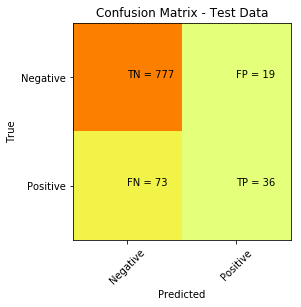

In [111]:
plt.clf()
plt.imshow(confusion_matrix3, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix4[i][j]))
plt.show()

In [116]:
sensitivity4 = confusion_matrix4[0,0]/(confusion_matrix4[0,0]+confusion_matrix4[1,0])
print('Sensitivity : ', sensitivity4 )

specificity4 = confusion_matrix4[1,1]/(confusion_matrix4[1,1]+confusion_matrix4[0,1])
print('Specificity : ', specificity4)

Sensitivity :  0.9141176470588235
Specificity :  0.6545454545454545


In [117]:
fpr, tpr, thresholds = roc_curve(y_test, pred4)
a=auc(fpr,tpr)
print("Area under the curve:",a)

Area under the curve: 0.6532029413120649


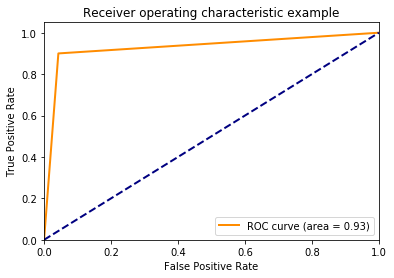

In [85]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % a)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       820
           1       0.95      0.90      0.93       780

   micro avg       0.93      0.93      0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



## Lasso Regression

Lasso Regression performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.
<br>It imposes a constraint on the model parameters that causes regression coefficients for some variables to shrink towards zero.

In [118]:
x=bank.iloc[:,0:42]
y=bank['y_yes']

In [87]:
y.value_counts()

0    4000
1     521
Name: y_yes, dtype: int64

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state=99,stratify=y) 

In [89]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train: (3164, 42)
y_train: (3164,)
x_test (1357, 42)
y_test (1357,)


In [90]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train,y_train) 
print("Coefficients:",clf.coef_)
print("Intercept:",clf.intercept_)

Coefficients: [ 0.00000000e+00  3.77276049e-07  0.00000000e+00  4.82321180e-04
 -0.00000000e+00  3.17535269e-04  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00]
Intercept: -0.02514680300354702


We can see from the output above that the coefficients of certain variables have been reduced to zero.

## Ridge Regression

In [91]:
x=bank.iloc[:,0:42]
y=bank['y_yes']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state=99,stratify=y)

In [93]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train: (3164, 42)
y_train: (3164,)
x_test (1357, 42)
y_test (1357,)


In [94]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
clf.predict(x_test)

array([ 0.00721008,  0.12887313,  0.16644772, ..., -0.09754676,
       -0.03956513,  0.06175469])

In [96]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha': [3.175, 3.77, 4.823]}
ridge_regressor=GridSearchCV(ridge, parameters,cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [3.175, 3.77, 4.823]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [97]:
print("Best parameter:", ridge_regressor.best_params_)
print("Best score:",ridge_regressor.best_score_)

Best parameter: {'alpha': 4.823}
Best score: 0.2569493635402708


## Grid Search 

It is a parameter tuning approach that will build model for each combination of algorithm parameters in a grid. And then returns that model which has the highest accuracy.

In [98]:
x=bank.iloc[:,0:42]
y=bank['y_yes']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=10) 

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg5=LogisticRegression()
logreg_cv=GridSearchCV(logreg5,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l1'}
accuracy : 0.900995575221239


In [102]:
logreg5

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
logreg6=LogisticRegression(C=1,penalty="l1")
logreg6.fit(x_train,y_train)
print("Score:",logreg6.score(x_test,y_test))

Score: 0.9005524861878453
